In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
account_details_labels= pd.read_csv("account_details_labels.csv")
account_details_labels.head(10)

,ID,MM,CPT,REV_CD,Type,imt,Expect_Amount,TotPayment,Code,Amount_Due,AR_Dollar_threshold,AR_Percentage,AR_Exist
0,TEDEL21429317,202,NaN,943,2,False,70.38,0.00,Other,70.38,False,1.000000,True
1,TEGSM76438944,12,NaN,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
2,TEGSM76438944,12,NaN,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
3,TEGSM76757665,102,NaN,320,2,False,38.93,29.59,Other,5.22,False,0.134087,True
4,TEGSM78301736,203,NaN,350,1,False,398.00,0.00,Other,398.00,True,1.000000,True
5,TEGSM78301736,203,NaN,636,1,False,398.00,0.00,Other,398.00,True,1.000000,True
6,TEGSM78301736,203,NaN,636,1,False,398.00,0.00,Other,398.00,True,1.000000,True
7,TEGSM78328200,203,NaN,636,2,False,1342.00,885.68,Other,1342.00,True,1.000000,True
8,TEGSM78328200,203,NaN,341,2,False,1342.00,885.68,Other,1342.00,True,1.000000,True
9,TEGSM78328200,203,NaN,343,2,False,1342.00,885.68,Other,1342.00,True,1.000000,True


In [7]:
account_details_labels.shape

(18305, 13)

In [8]:
account_details_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18305 entries, 0 to 18304
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   18305 non-null  object 
 1   MM                   18305 non-null  int64  
 2   CPT                  1592 non-null   float64
 3   REV_CD               18305 non-null  int64  
 4   Type                 18305 non-null  int64  
 5   imt                  18305 non-null  bool   
 6   Expect_Amount        18305 non-null  float64
 7   TotPayment           18305 non-null  float64
 8   Code                 9740 non-null   object 
 9   Amount_Due           18305 non-null  float64
 10  AR_Dollar_threshold  18305 non-null  bool   
 11  AR_Percentage        18305 non-null  float64
 12  AR_Exist             18305 non-null  bool   
dtypes: bool(3), float64(5), int64(3), object(2)
memory usage: 1.4+ MB


In [9]:
account_details_labels.describe()

,MM,CPT,REV_CD,Type,Expect_Amount,TotPayment,Amount_Due,AR_Percentage
count,18305.000000,1592.00000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000
mean,66.513084,32403.09108,474.827643,1.625567,25073.042457,19551.072959,6059.637282,0.188729
std,61.823697,10102.79031,199.630701,0.483989,22619.856617,19274.686331,15282.359594,0.603247
min,1.000000,410.00000,250.000000,1.000000,0.000000,0.000000,-1236.650000,0.000000
25%,8.000000,33285.00000,300.000000,1.000000,1342.000000,1086.000000,0.000000,0.000000
50%,101.000000,36569.00000,403.000000,2.000000,16068.620000,14735.800000,215.080000,0.020357
75%,108.000000,36590.00000,636.000000,2.000000,42916.140000,32352.440000,9299.150000,0.239047
max,203.000000,37197.00000,943.000000,2.000000,138125.110000,186732.400000,270319.000000,44.389241


In [11]:
account_details_labels.columns

Index(['ID', 'MM', 'CPT', 'REV_CD', 'Type', 'imt', 'Expect_Amount',
       'TotPayment', 'Code', 'Amount_Due', 'AR_Dollar_threshold',
       'AR_Percentage', 'AR_Exist'],
      dtype='object')

In [13]:
account_details_labels.dtypes

ID                      object
MM                       int64
CPT                    float64
REV_CD                   int64
Type                     int64
imt                       bool
Expect_Amount          float64
TotPayment             float64
Code                    object
Amount_Due             float64
AR_Dollar_threshold       bool
AR_Percentage          float64
AR_Exist                  bool
dtype: object

In [16]:
account_details_labels.isna().sum()

ID                         0
MM                         0
CPT                    16713
REV_CD                     0
Type                       0
imt                        0
Expect_Amount              0
TotPayment                 0
Code                    8565
Amount_Due                 0
AR_Dollar_threshold        0
AR_Percentage              0
AR_Exist                   0
dtype: int64

In [17]:
round(100*(account_details_labels.isnull().sum()/len(account_details_labels.index)), 2)

ID                      0.00
MM                      0.00
CPT                    91.30
REV_CD                  0.00
Type                    0.00
imt                     0.00
Expect_Amount           0.00
TotPayment              0.00
Code                   46.79
Amount_Due              0.00
AR_Dollar_threshold     0.00
AR_Percentage           0.00
AR_Exist                0.00
dtype: float64

In [18]:
account_details_labels.drop('CPT', inplace=True, axis=1)

In [19]:
account_details_labels.head(5)

,ID,MM,REV_CD,Type,imt,Expect_Amount,TotPayment,Code,Amount_Due,AR_Dollar_threshold,AR_Percentage,AR_Exist
0,TEDEL21429317,202,943,2,False,70.38,0.00,Other,70.38,False,1.000000,True
1,TEGSM76438944,12,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
2,TEGSM76438944,12,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
3,TEGSM76757665,102,320,2,False,38.93,29.59,Other,5.22,False,0.134087,True
4,TEGSM78301736,203,350,1,False,398.00,0.00,Other,398.00,True,1.000000,True


In [22]:
account_details_labels['REV_CD'].value_counts()

300    4452
636    4249
480    1816
278    1104
943    1087
272     949
250     787
370     738
637     724
730     571
320     319
710     290
402     242
350     173
482     137
360     117
260      95
921      87
343      82
341      79
610      42
731      36
403      34
410      22
460      10
740       9
419       9
420       8
258       8
510       6
750       5
430       4
440       4
424       2
615       2
450       2
310       1
771       1
401       1
444       1
Name: REV_CD, dtype: int64

In [23]:
account_details_labels['Type'].value_counts()

2    11451
1     6854
Name: Type, dtype: int64

<AxesSubplot:ylabel='Type'>

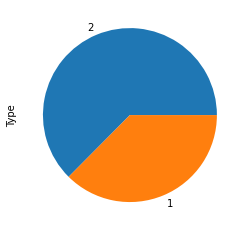

In [24]:
account_details_labels['Type'].value_counts().plot.pie()

<AxesSubplot:ylabel='imt'>

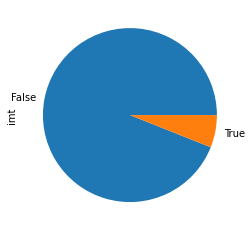

In [25]:
account_details_labels['imt'].value_counts().plot.pie()

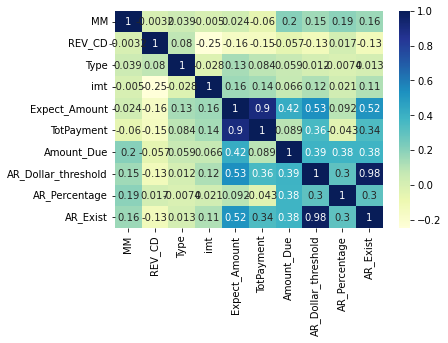

In [27]:
sns.heatmap(account_details_labels.corr(),cmap="YlGnBu",annot = True)
plt.show()

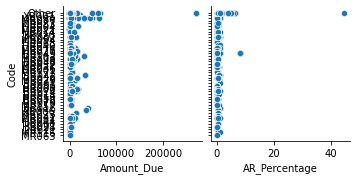

In [34]:
sns.pairplot(account_details_labels, x_vars=['Amount_Due','AR_Percentage'], y_vars='Code',kind='scatter')
plt.show()

<AxesSubplot:xlabel='Expect_Amount'>

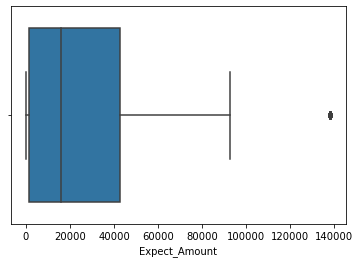

In [35]:
sns.boxplot(account_details_labels['Expect_Amount'])

<AxesSubplot:xlabel='TotPayment'>

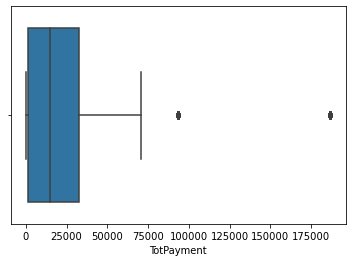

In [36]:
sns.boxplot(account_details_labels['TotPayment'])

<AxesSubplot:xlabel='REV_CD'>

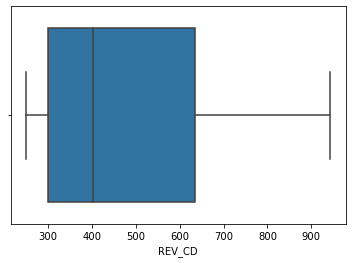

In [37]:
sns.boxplot(account_details_labels['REV_CD'])

In [38]:
account_details_labels['Amount_Due'].value_counts()

0.00        8565
11738.72      56
16819.21      54
22387.25      53
9638.47       53
            ... 
175.00         1
15.16          1
1064.96        1
760.00         1
70.38          1
Name: Amount_Due, Length: 468, dtype: int64

#### Deleting amount_due is equal to 0... Because of No due.

In [39]:
account_details_labels = account_details_labels.loc[~((account_details_labels['Amount_Due'] == 0) | (account_details_labels['Amount_Due'] == 0))]
account_details_labels.head(10)

,ID,MM,REV_CD,Type,imt,Expect_Amount,TotPayment,Code,Amount_Due,AR_Dollar_threshold,AR_Percentage,AR_Exist
0,TEDEL21429317,202,943,2,False,70.38,0.00,Other,70.38,False,1.000000,True
1,TEGSM76438944,12,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
2,TEGSM76438944,12,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
3,TEGSM76757665,102,320,2,False,38.93,29.59,Other,5.22,False,0.134087,True
4,TEGSM78301736,203,350,1,False,398.00,0.00,Other,398.00,True,1.000000,True
5,TEGSM78301736,203,636,1,False,398.00,0.00,Other,398.00,True,1.000000,True
6,TEGSM78301736,203,636,1,False,398.00,0.00,Other,398.00,True,1.000000,True
7,TEGSM78328200,203,636,2,False,1342.00,885.68,Other,1342.00,True,1.000000,True
8,TEGSM78328200,203,341,2,False,1342.00,885.68,Other,1342.00,True,1.000000,True
9,TEGSM78328200,203,343,2,False,1342.00,885.68,Other,1342.00,True,1.000000,True


In [40]:
account_details_labels.shape

(9740, 12)

In [41]:
account_details_labels['AR_Exist'].value_counts()

True     9537
False     203
Name: AR_Exist, dtype: int64

<AxesSubplot:>

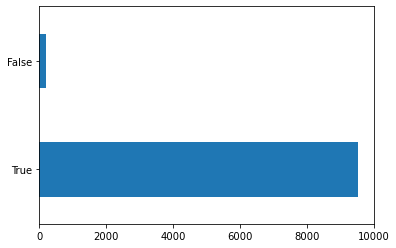

In [46]:
account_details_labels['AR_Exist'].value_counts().plot.barh()

<AxesSubplot:xlabel='AR_Percentage', ylabel='Density'>

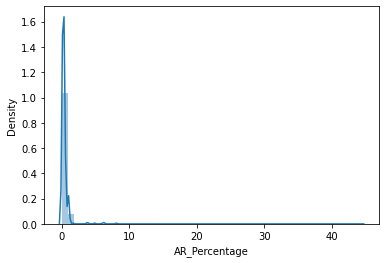

In [47]:
sns.distplot(account_details_labels['AR_Percentage'])

<AxesSubplot:xlabel='Amount_Due', ylabel='Density'>

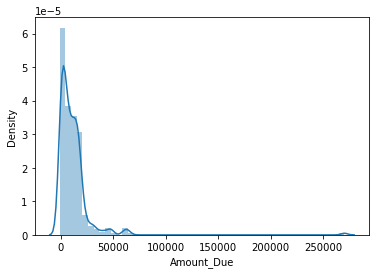

In [50]:
sns.distplot(account_details_labels['Amount_Due'])

In [51]:
account_details_labels['Code'].value_counts()

MR080    4506
Other    1435
HR004     614
MR076     310
HR027     275
BR049     228
MR081     207
HR006     187
BR029     184
MR103     166
BR074     162
MR098     152
MR083     136
MR036     123
PR002     118
HR014      85
MR032      66
XR001      55
MR157      54
XR020      52
HR028      44
XR006      44
MR042      42
MR021      42
MR023      41
BR078      40
HR044      33
BR042      31
BR016      29
BR014      29
MR077      28
BR048      27
HR058      27
BR070      26
BR009      24
PR021      23
MR172      22
MR094      20
HR001      18
MR029      18
HR040       5
HR068       4
MR063       3
PR001       2
MR116       2
BR001       1
Name: Code, dtype: int64

In [52]:
grouped_df = account_details_labels.groupby('ID')['TotPayment'].sum()
grouped_df = grouped_df.reset_index()
grouped_df

,ID,TotPayment
0,TEDEL19469808,516528.00
1,TEDEL19519236,762961.00
2,TEDEL19519953,250.00
3,TEDEL19545547,211496.88
4,TEDEL19575837,1000.00
...,...,...
472,TEWBO103624304,121.44
473,TEWBO103880483,0.00
474,TEWBO103938880,2506.18
475,TEWBO104106714,0.00


In [53]:
grouped_df1 = account_details_labels.groupby('ID')['Amount_Due'].sum()
grouped_df1 = grouped_df1.reset_index()
grouped_df1

,ID,Amount_Due
0,TEDEL19469808,135456.00
1,TEDEL19519236,125898.57
2,TEDEL19519953,5520.00
3,TEDEL19545547,20868.12
4,TEDEL19575837,1008.00
...,...,...
472,TEWBO103624304,70.56
473,TEWBO103880483,2220.00
474,TEWBO103938880,1064.96
475,TEWBO104106714,85.56


In [54]:
grouped_df = pd.merge(grouped_df, grouped_df1, on='ID', how='inner')
grouped_df.head()

,ID,TotPayment,Amount_Due
0,TEDEL19469808,516528.00,135456.00
1,TEDEL19519236,762961.00,125898.57
2,TEDEL19519953,250.00,5520.00
3,TEDEL19545547,211496.88,20868.12
4,TEDEL19575837,1000.00,1008.00


In [55]:
frequency = account_details_labels.groupby('ID')['AR_Percentage'].count()
frequency = frequency.reset_index()
frequency

,ID,AR_Percentage
0,TEDEL19469808,24
1,TEDEL19519236,29
2,TEDEL19519953,5
3,TEDEL19545547,21
4,TEDEL19575837,2
...,...,...
472,TEWBO103624304,1
473,TEWBO103880483,6
474,TEWBO103938880,1
475,TEWBO104106714,2


In [56]:
grouped_df = pd.merge(grouped_df, frequency, on='ID', how='inner')
grouped_df.columns = ['ID', 'TotPayment', 'Amount_Due', 'AR_Percentage']
grouped_df.head()

,ID,TotPayment,Amount_Due,AR_Percentage
0,TEDEL19469808,516528.00,135456.00,24
1,TEDEL19519236,762961.00,125898.57,29
2,TEDEL19519953,250.00,5520.00,5
3,TEDEL19545547,211496.88,20868.12,21
4,TEDEL19575837,1000.00,1008.00,2


In [57]:
grouped_df['AR_Percentage'].sum()

9740

{'whiskers': [<matplotlib.lines.Line2D at 0x28f86ee3100>,
 'caps': [<matplotlib.lines.Line2D at 0x28f86ee36a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f86ed6df0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f86ee3bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f86ee3e80>],
 'means': []}

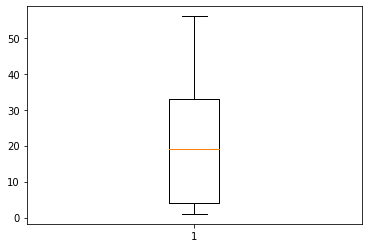

In [58]:
# 1. outlier treatment
plt.boxplot(grouped_df['AR_Percentage'])

In [61]:
# 1. removing (statistical) outliers

In [62]:
Q1 = grouped_df.TotPayment.quantile(0.05)
Q3 = grouped_df.TotPayment.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.TotPayment >= Q1 - 1.5*IQR) & (grouped_df.TotPayment <= Q3 + 1.5*IQR)]

# outlier treatment for Amount_Due
Q1 = grouped_df.Amount_Due.quantile(0.05)
Q3 = grouped_df.Amount_Due.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Amount_Due >= Q1 - 1.5*IQR) & (grouped_df.Amount_Due <= Q3 + 1.5*IQR)]

# outlier treatment for AR_Percentage
Q1 = grouped_df.AR_Percentage.quantile(0.05)
Q3 = grouped_df.AR_Percentage.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.AR_Percentage >= Q1 - 1.5*IQR) & (grouped_df.AR_Percentage <= Q3 + 1.5*IQR)]

In [63]:
# 2. rescaling
rfm_df = grouped_df[['TotPayment', 'Amount_Due', 'AR_Percentage']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(472, 3)

In [64]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['TotPayment', 'Amount_Due', 'AR_Percentage']
rfm_df_scaled.head()

,TotPayment,Amount_Due,AR_Percentage
0,-0.001485,-0.192645,0.244128
1,0.365888,-0.222422,0.567985
2,-0.771134,-0.597472,-0.986529
3,-0.456215,-0.549653,0.049814
4,-0.770016,-0.611529,-1.180844


In [65]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [66]:
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1,
       0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 3, 1, 1, 0,
       1, 0, 2, 0, 2, 1, 3, 1, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 0, 3, 1, 2, 1, 1, 0, 1,

### Finding the Optimal Number of Clusters SSD

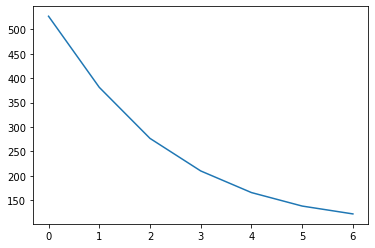

In [67]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [69]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [70]:
kmeans.labels_

array([2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1,

In [71]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,ID,TotPayment,Amount_Due,AR_Percentage,cluster_id
0,TEDEL19469808,516528.00,135456.00,24,2
1,TEDEL19519236,762961.00,125898.57,29,2
2,TEDEL19519953,250.00,5520.00,5,0
3,TEDEL19545547,211496.88,20868.12,21,2
4,TEDEL19575837,1000.00,1008.00,2,0


<AxesSubplot:xlabel='cluster_id', ylabel='TotPayment'>

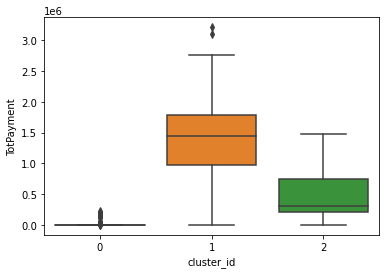

In [72]:
# plot
sns.boxplot(x='cluster_id', y='TotPayment', data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Amount_Due'>

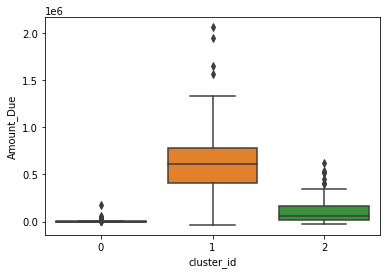

In [73]:
# plot
sns.boxplot(x='cluster_id', y='Amount_Due', data=grouped_df)

In [74]:
account_details_labels['AR_Exist'].value_counts()

True     9537
False     203
Name: AR_Exist, dtype: int64

In [75]:
account_details_labels['AR_Dollar_threshold'].value_counts()

True     9356
False     384
Name: AR_Dollar_threshold, dtype: int64

In [76]:
df=account_details_labels.groupby(['Code'])['Amount_Due'].sum()
df = df.reset_index()
df

,Code,Amount_Due
0,BR001,222.38
1,BR009,128730.68
2,BR014,8084.44
3,BR016,1161995.20
4,BR029,750757.98
5,BR042,925315.80
6,BR048,160759.08
7,BR049,1192683.07
8,BR070,60756.28
9,BR074,1543624.16


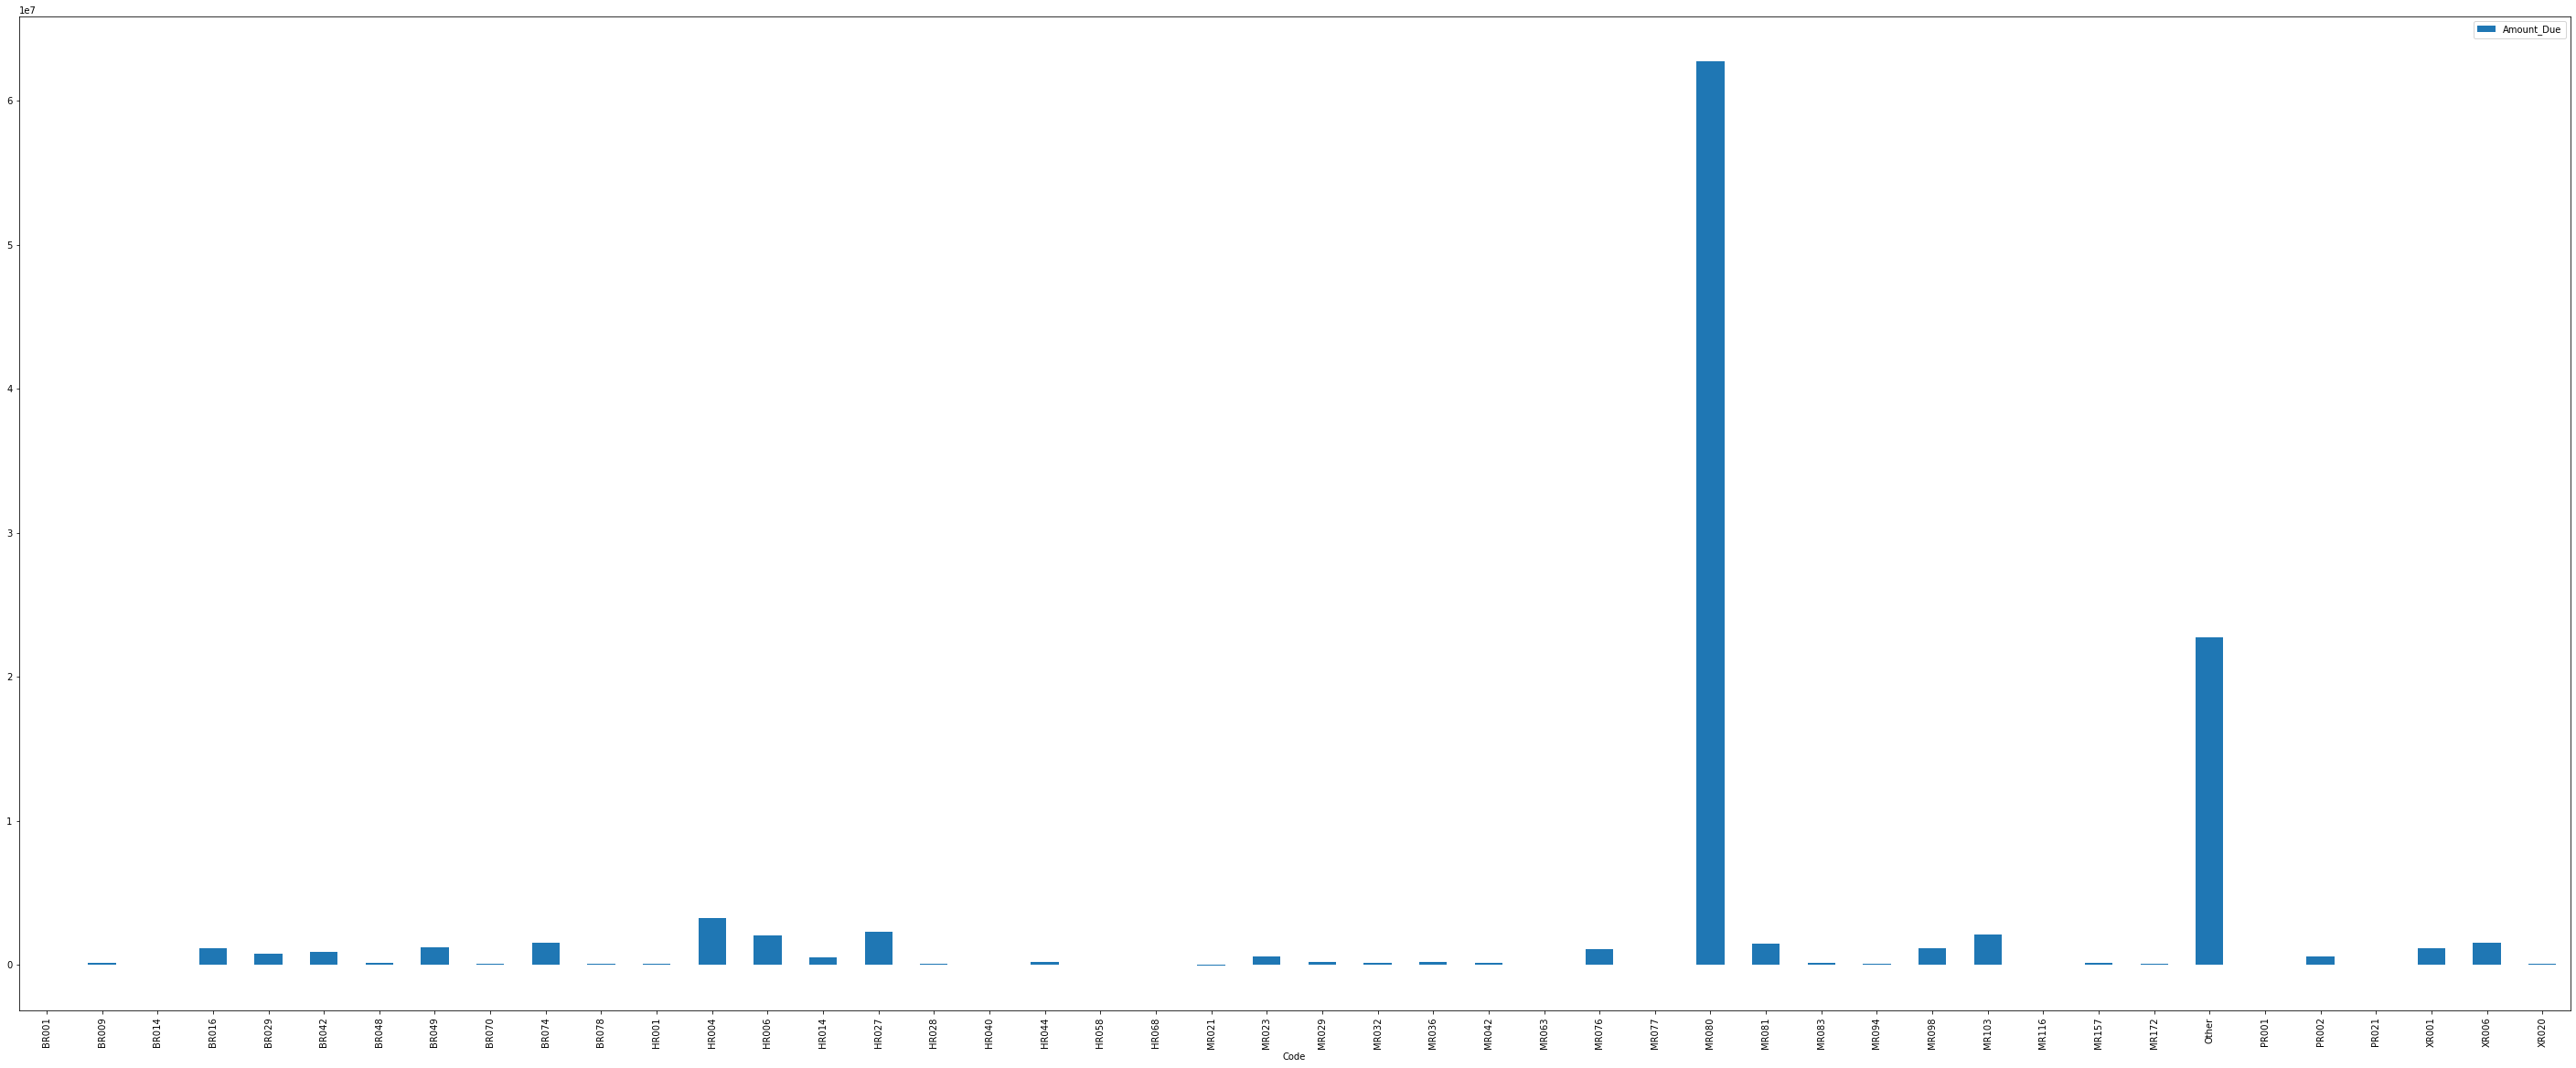

In [78]:
df.plot(x="Code", y="Amount_Due", kind="bar")
plt.rcParams["figure.figsize"] = (100, 50)

In [79]:
df['Amount_Due'].nlargest(n=10).sum()

100977142.83

In [80]:
df['Amount_Due'].sum()

110921660.44000001

In [81]:
df1=account_details_labels.groupby(['Code'])['AR_Dollar_threshold'].sum()
df1 = df1.reset_index()
df1

,Code,AR_Dollar_threshold
0,BR001,1
1,BR009,23
2,BR014,27
3,BR016,29
4,BR029,158
5,BR042,31
6,BR048,27
7,BR049,228
8,BR070,26
9,BR074,162


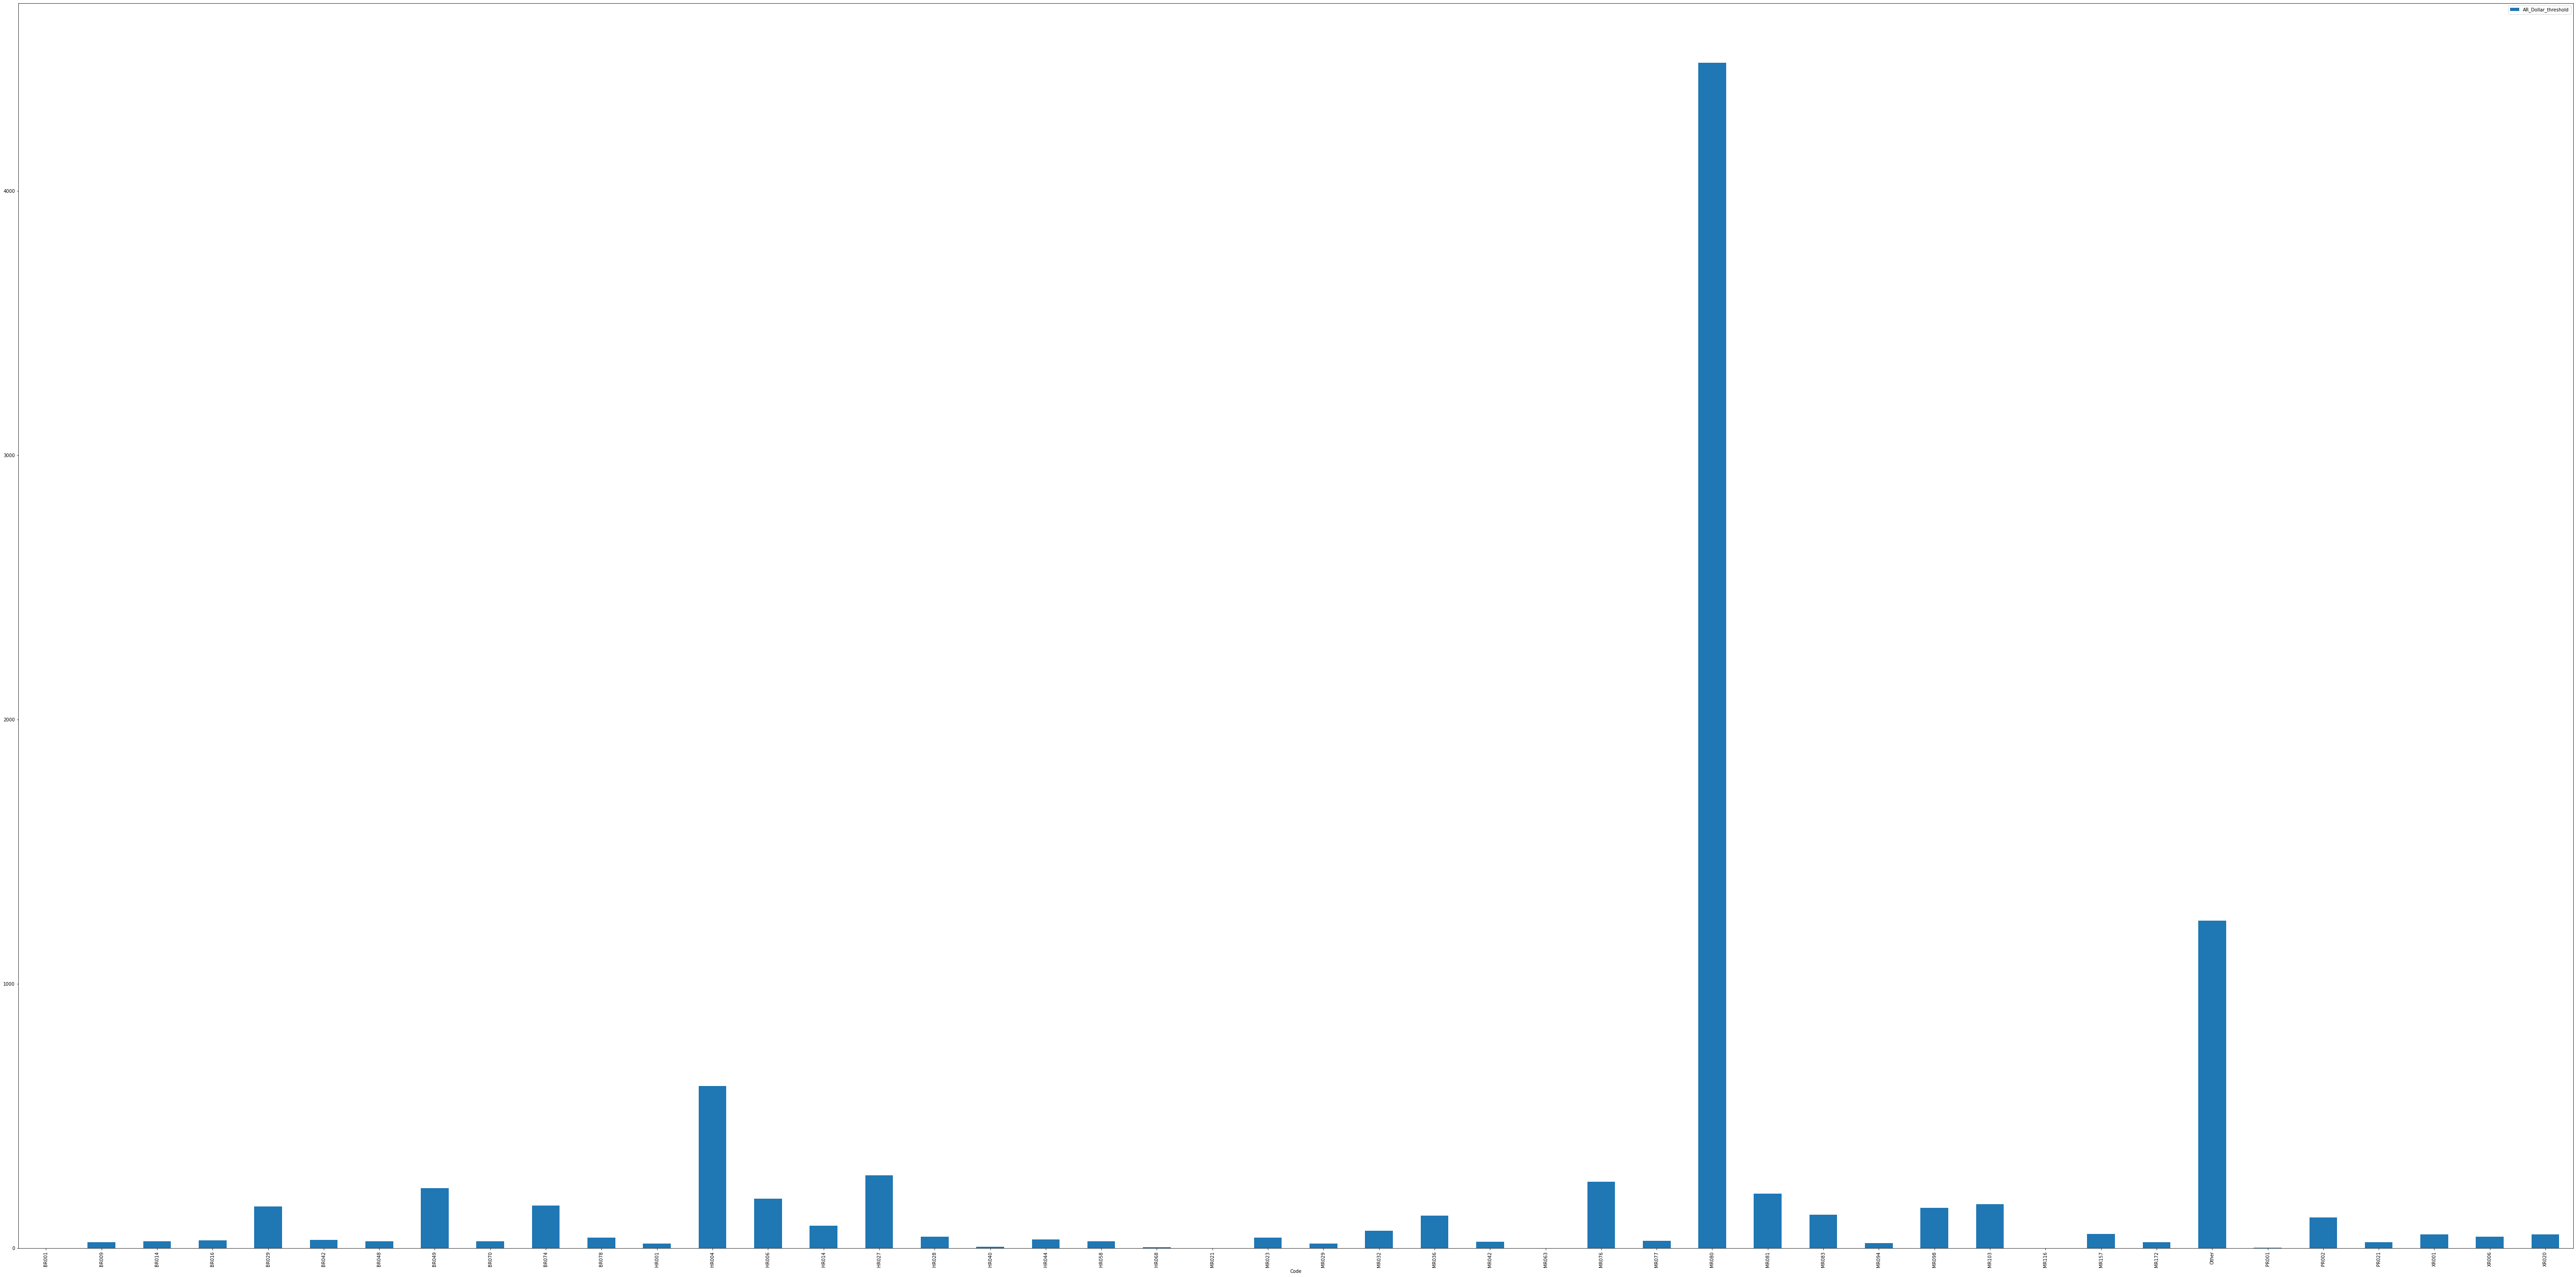

In [82]:
df1.plot(x="Code", y="AR_Dollar_threshold", kind="bar")
plt.rcParams["figure.figsize"] = (100, 50)

In [83]:
df1['AR_Dollar_threshold'].max()

4485

In [84]:
df1['AR_Dollar_threshold'].sum()

9356

In [85]:
df2=account_details_labels.groupby(['Code'])['AR_Percentage'].sum()
df2 = df2.reset_index()
df2

,Code,AR_Percentage
0,BR001,0.882355
1,BR009,3.430718
2,BR014,1.601288
3,BR016,29.237880
4,BR029,23.648615
5,BR042,21.165075
6,BR048,5.142023
7,BR049,216.179987
8,BR070,3.879231
9,BR074,56.448264


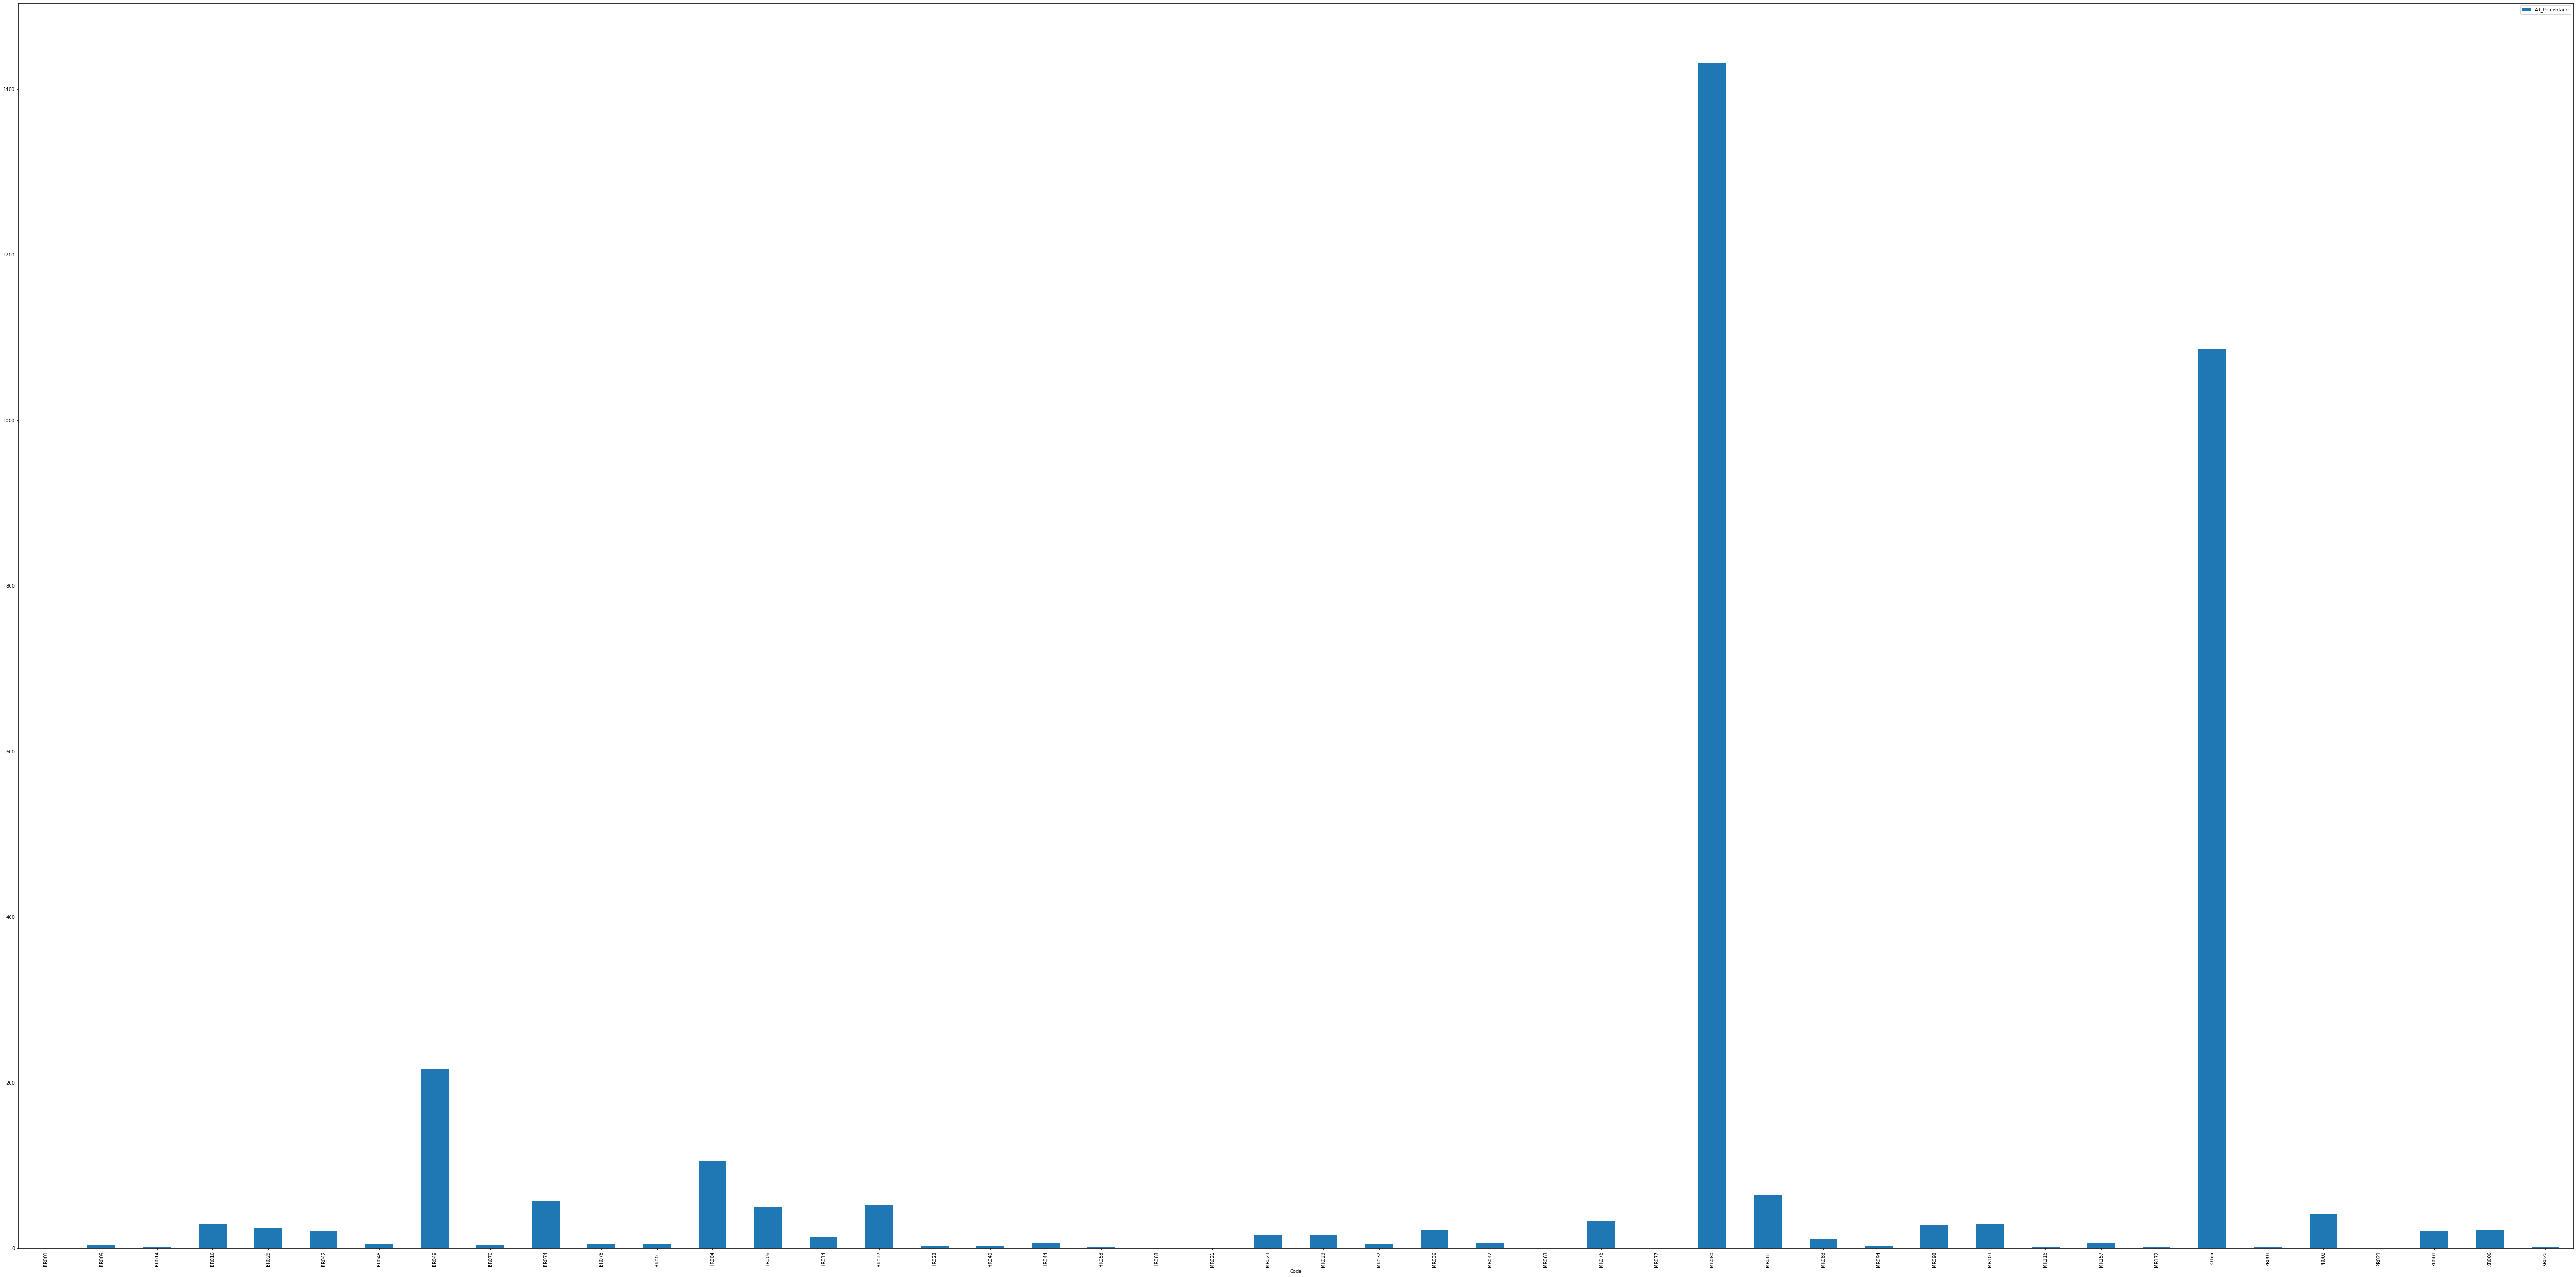

In [86]:
df2.plot(x="Code", y="AR_Percentage", kind="bar")
plt.rcParams["figure.figsize"] = (100, 50)

In [87]:
df3=account_details_labels.groupby(['Code'])['AR_Exist'].sum()
df3 = df3.reset_index()
df3

,Code,AR_Exist
0,BR001,1
1,BR009,23
2,BR014,29
3,BR016,29
4,BR029,158
5,BR042,31
6,BR048,27
7,BR049,228
8,BR070,26
9,BR074,162


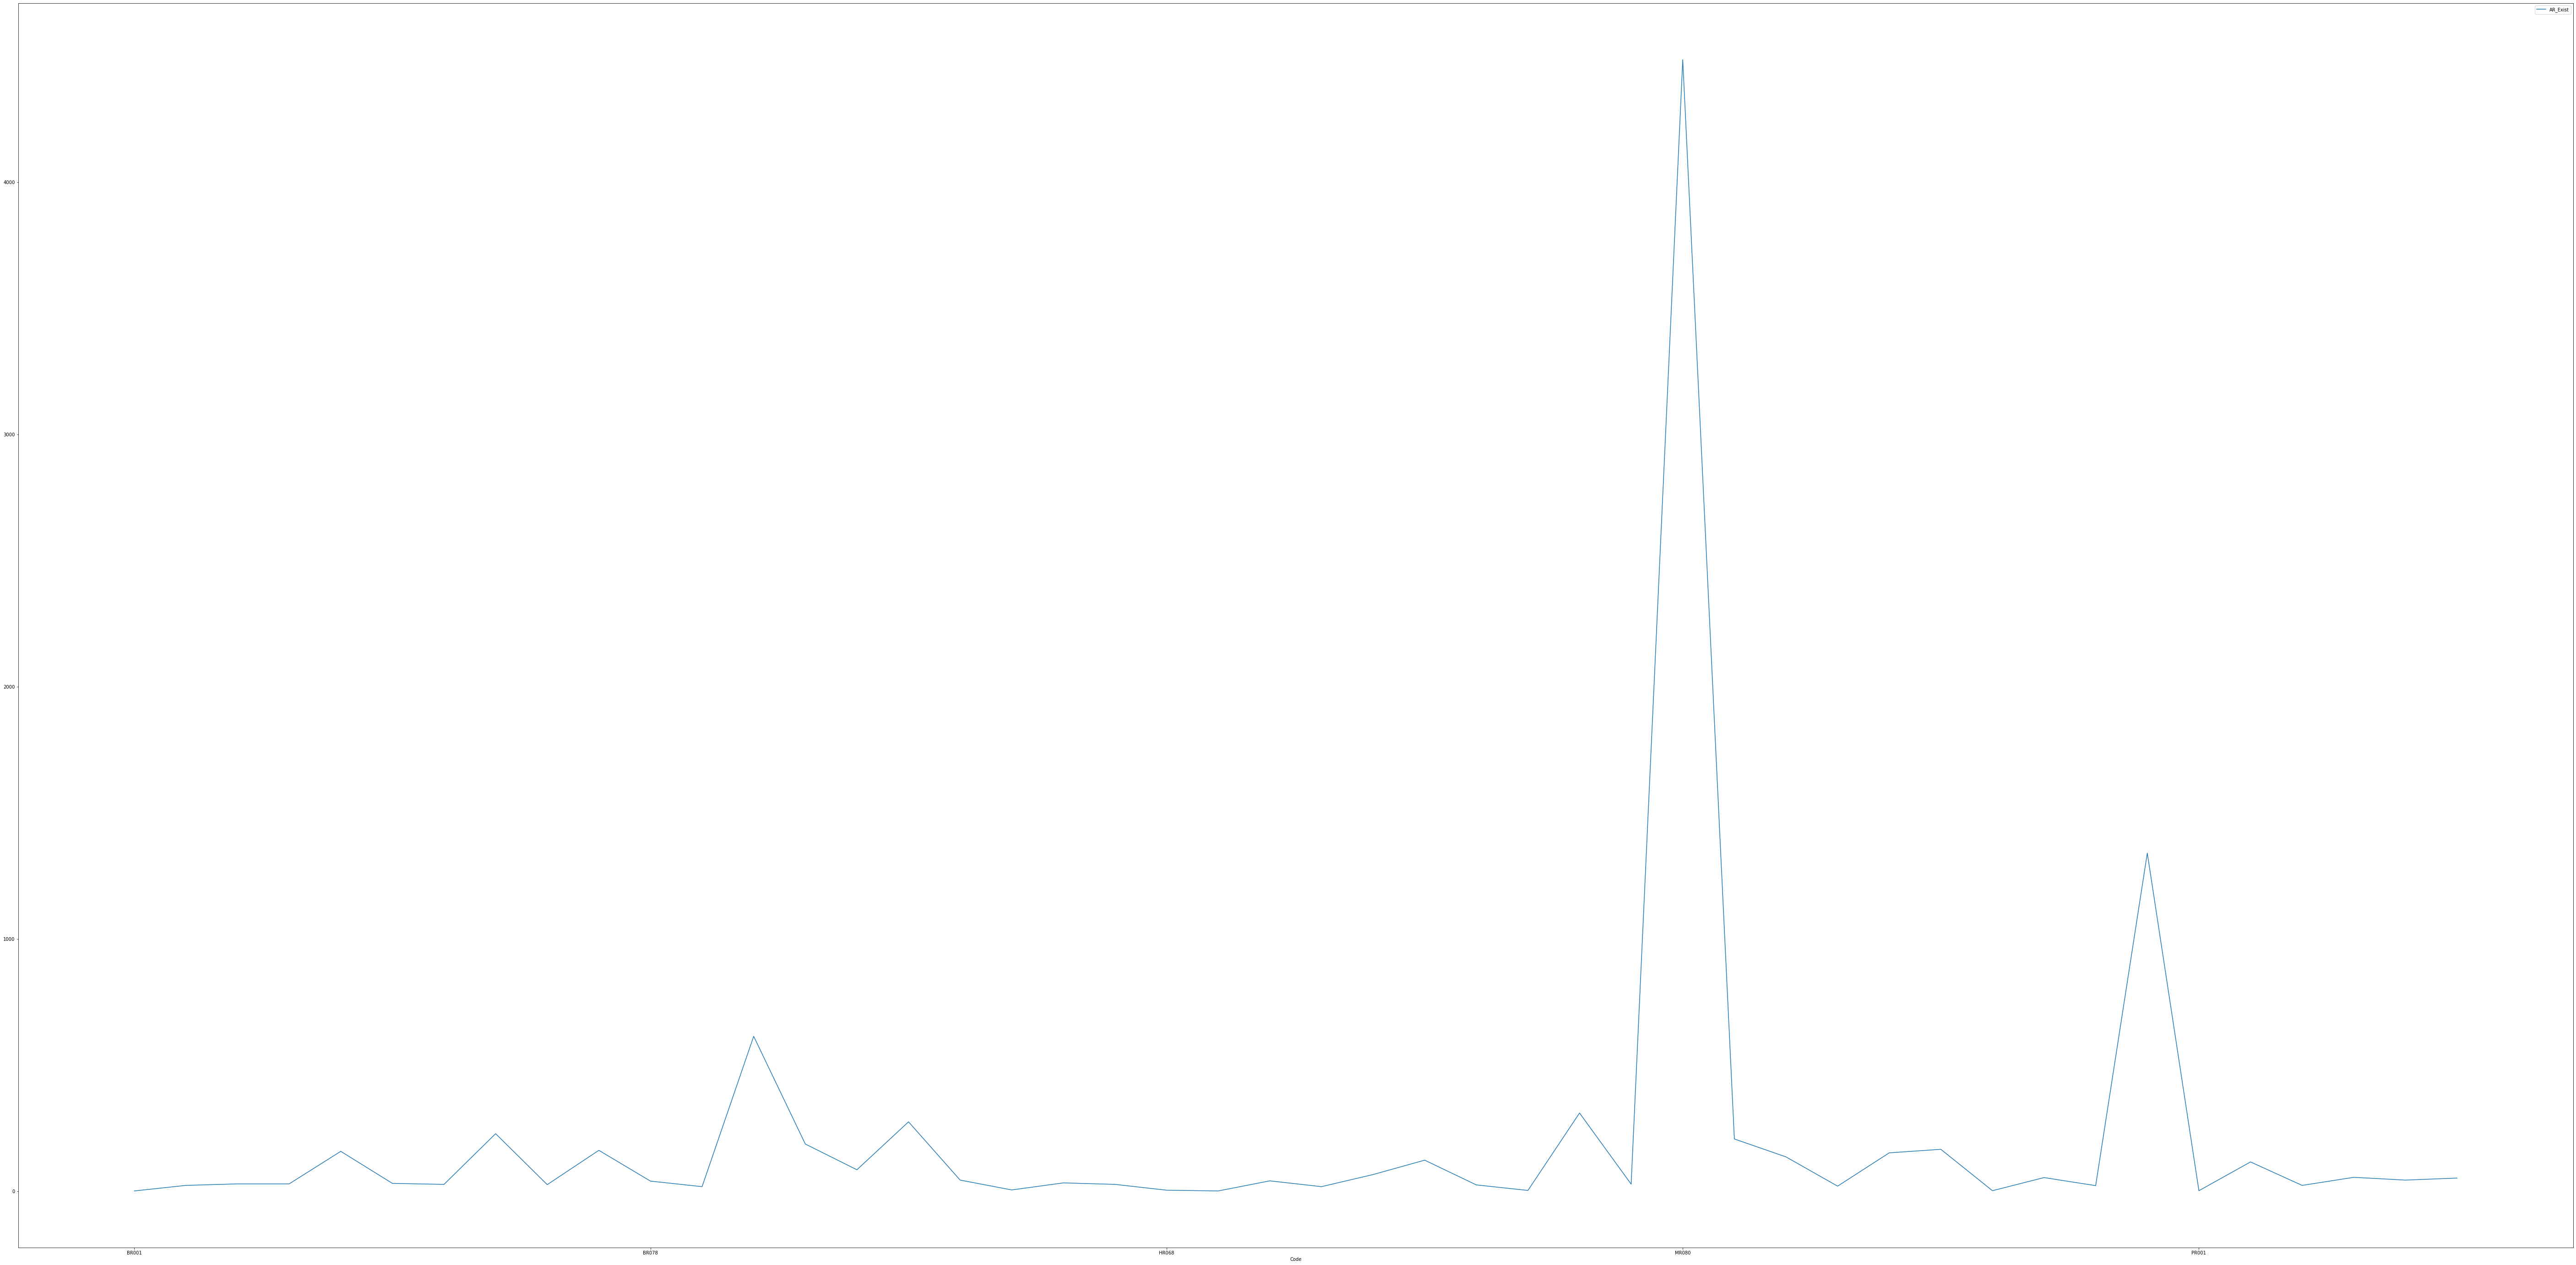

In [88]:
df3.plot(x="Code", y="AR_Exist", kind="line")
plt.rcParams["figure.figsize"] = (100, 50)